In [1]:
import sys
import os

import sqlite3
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

sys.path.insert(0, '../src') # add library code to path

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Download Zipped XML Wikipedia Data

* The Wikimedia Dumps are located at ```https://dumps.wikimedia.org/enwiki/20200401/```
* Make sure to change the date at the end to the first day of a recent month

In [2]:
from wikiparser import download_metadata_zips

num_files_download = 1
zip_outdir = "../data/raw/zips"
meta_date = '20200401'
overwrite_current = False

download_metadata_zips(num_files_download, zip_outdir , meta_date, overwrite=overwrite_current)

https://dumps.wikimedia.org/enwiki/20200401/enwiki-20200401-stub-meta-history1.xml.gz


In [3]:
zips = os.listdir(zip_outdir)
zips

['metadata-20200401-1.xml.gz', '.ipynb_checkpoints']

# 2. Unzip XML Files

* Grab all .gz files and attempt to unzip

In [4]:
from wikiparser import gunzip_shutil

extract_outdir = "../data/raw/extracted"

for gzip_file in os.listdir(zip_outdir ):
    if gzip_file[-2:] == "gz":
        gunzip_shutil(zip_outdir + "/" + gzip_file, extract_outdir)
    

Extracted file already exists: ../data/raw/extracted/metadata-20200401-1.xml


# 3. Processing Raw Data to Lightdump

* Process 1500 articles making sure to include the ones passed in the list ```articles```
* Ignore less revised articles with under 800 revisions

In [5]:
from wikiparser import parse_metadata_to_lightdump

# Parse the Wikimedia Metadata XML File into Lightdump Format
file_to_parse = "../data/raw/extracted/metadata-20200401-1.xml"
lightdump_filename = "popularity_lightdump.txt"
temp_dir = "../data/temp"
articles = ['American_Football_Conference', 'Blizzard_Entertainment', 'American_League_Championship_Series']
num_articles_to_process = 1500
min_revisions = 800

# parse_metadata_to_lightdump(file_to_parse, 
#                             lightdump_filename, 
#                             temp_dir, 
#                             articles, 
#                             num_articles_to_process, 
#                             min_revisions)

# Visualize Lightdump Article Byte Size

* We see a lot of noise in these graphs of byte size, sometimes caused by internet griefers
* Many revisions actually condense or move information to branch article pages thereby reducing byte size

In [6]:
from engagement_score import create_wiki_graph

output_dir = "../data/out"
lightdump_filepath = temp_dir + "/" + lightdump_filename

Starting Lightdump Parse for: American_League_Championship_Series
Finished Lightdump Parse => num revisions: 812
Saving plot to "../data/out/American_League_Championship_Series.png"


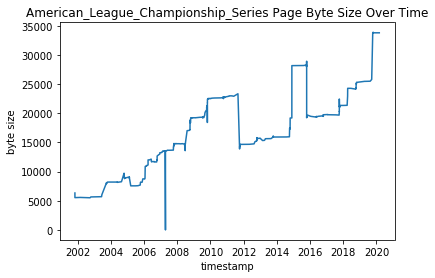

In [8]:
fig1 = create_wiki_graph(lightdump_filepath, 
                         'American_League_Championship_Series', 
                         output_dir)

Starting Lightdump Parse for: Blizzard_Entertainment
Finished Lightdump Parse => num revisions: 4128
Saving plot to "../data/out/Blizzard_Entertainment.png"


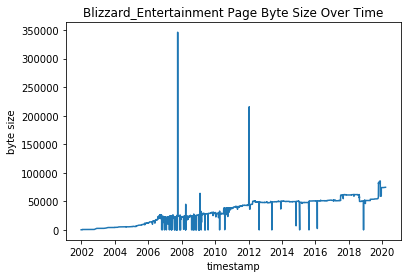

In [9]:
fig2 = create_wiki_graph(lightdump_filepath, "Blizzard_Entertainment", output_dir)

# 4. Lightdump to DB Averaged by Month

* Creating metrics to use for Engagement Score

#### For each article:
1. Averaging Byte Size over each month
2. Counting number of unique editors per month
3. Counting number of edits per month

In [8]:
from engagement_score import lightdump_to_db

db_outfile = temp_dir + "/articles.db"

# lightdump_to_db(lightdump_filepath, db_outfile, num_articles_to_process) # num_articles_to_process = 1500


# 5. Editor Engagement Score
* Penalize only few editors making a lot of edits
* We favor lots of edits from many unique editors over lots of edits from few people
* Sum the squares
* Multiple both numbers

In [9]:
from engagement_score import selectArticlesDB

football = selectArticlesDB(db_outfile, ['American_Football_Conference'])
blizzard = selectArticlesDB(db_outfile, ['Blizzard_Entertainment'])
mlb_alcs = selectArticlesDB(db_outfile, ['American_League_Championship_Series'])

SELECT * FROM ARTICLES WHERE article_title="American_Football_Conference"
SELECT * FROM ARTICLES WHERE article_title="Blizzard_Entertainment"
SELECT * FROM ARTICLES WHERE article_title="American_League_Championship_Series"


In [10]:
mlb_alcs.head()

,timestamp,avg_bytes,edits,nunique_editors,article_title
0,2001-11-30,5544.0,1,1,American_League_Championship_Series
1,2001-12-31,0.0,0,0,American_League_Championship_Series
2,2002-01-31,0.0,0,0,American_League_Championship_Series
3,2002-02-28,5577.0,1,1,American_League_Championship_Series
4,2002-03-31,0.0,0,0,American_League_Championship_Series


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from engagement_score import editor_engagement_score

American_League_Championship_Series


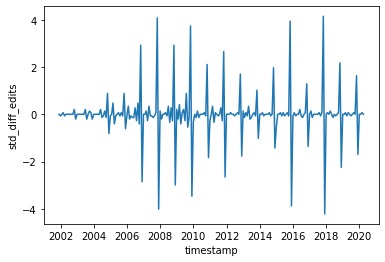

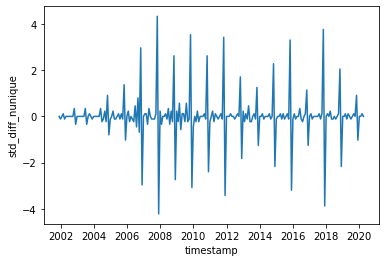

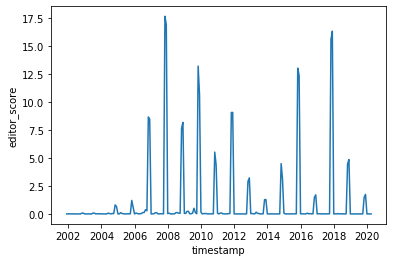

In [21]:
output_file = output_dir + "/mlb_editor_score.csv"

mlb_df = editor_engagement_score(mlb_alcs, output_file)

ax = sns.lineplot(x='timestamp', y='std_diff_edits', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='std_diff_nunique', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='editor_score', data=mlb_df)
plt.show()

Blizzard_Entertainment


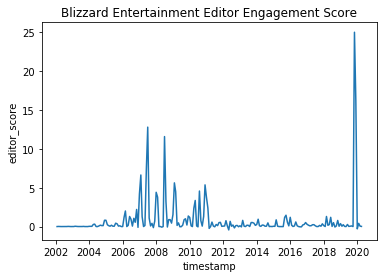

In [22]:
output_file = output_dir + "/blizzard_editor_score.csv"

blizzard_df = editor_engagement_score(blizzard, output_file)

ax = sns.lineplot(x='timestamp', y='editor_score', data=blizzard_df)
ax.set_title("Blizzard Entertainment Editor Engagement Score")
plt.show()

In [31]:
from engagement_score import selectArticlesDB

outfile = "../data/temp/articles.db"
output_file = output_dir + "/editor_score.csv"

df = selectArticlesDB(outfile, [])

editor_scores = editor_engagement_score(df, output_file)

SELECT * FROM ARTICLES
Anarchism
Autism
Albedo
A
Alabama
Achilles
Abraham_Lincoln
Aristotle
Academy_Award_for_Best_Production_Design
Academy_Awards
Altruism
Ayn_Rand
Algeria
List_of_Atlas_Shrugged_characters
Anthropology
Alchemy
Alien
Astronomer
ASCII
Animation
Apollo
Andre_Agassi
Afroasiatic_languages
Andorra
American_Football_Conference
Animal_Farm
Amphibian
Alaska
Agriculture
Aldous_Huxley
Algae
Analysis_of_variance
Alkane
America_the_Beautiful
Assistive_technology
Abacus
Acid
Asphalt
Apollo_11
Apollo_8
Astronaut
A_Modest_Proposal
Alkali_metal
Alphabet
Atomic_number
Anatomy
Andrei_Tarkovsky
Ambiguity
Aardvark
Adobe
Adventure
Asia
Aruba
Articles_of_Confederation
Atlantic_Ocean
Arthur_Schopenhauer
Angola
Android_(robot)
Alberta
Talk:Animal
Albert_Einstein
Afghanistan
Albania
Allah
Azerbaijan
Amateur_astronomy
Aikido
Art
Abortion
American_Revolutionary_War
Ampere
Talk:American_football
Algorithm
Mouthwash
Alexander_the_Great
Asteroids_(video_game)
Asteroid
Aries_(constellation)
Aquariu

Alex_Lifeson
Artemis
Arbeit_macht_frei
Albinism_in_humans
Amr_Diab
Anaïs_Nin
AIM_(software)
Ackermann_function
Albanians
Association_for_Computing_Machinery
Talk:Axiom_of_choice
Anabaptism
And_did_those_feet_in_ancient_time
A_Little_Night_Music
Ariel_Sharon
Alkali
Talk:Astrology
Convex_uniform_honeycomb
Assassination
Alcoholism
Abstraction
Talk:Arab–Israeli_conflict
Austria-Hungary
Abracadabra
Acts_of_Union_1707
Amputation
Anemometer
Archaeopteryx
Adrian_Lamo
Associate_Justice_of_the_Supreme_Court_of_the_United_States
Al_Capp
ʻAbdu'l-Bahá
Anubis
Aleut
Acid–base_reaction
Autumn
Alameda,_California
Accrington
Armageddon
Athlon
Muslim_conquests_of_Afghanistan
Durrani_Empire
Arcturus
Albert_Brooks
Antares
Aldebaran
Australian_Broadcasting_Corporation
Alexandria
Alexandria,_Louisiana
Akira_Toriyama
Asymptote
Ariane_5
Abu_Zubaydah
Arithmetic
Adolphe_Sax
Atlanta
A_Doll's_House
AIM-120_AMRAAM
Lockheed_AC-130
Arbitrage
ACF_Fiorentina
Afrobeat
Alien_and_Sedition_Acts
A._E._Housman
Talk:Augusto_P

Charlie_Chaplin
The_World_Factbook
Country
Copenhagen
Combinatorics
Calculus
Communication
Classics
Chemistry
Cytoplasm
Christ_(title)
Central_Europe
Geography_of_Canada
Demographics_of_Canada
Politics_of_Canada
Economy_of_Canada
Canada–United_States_relations
Talk:Canada
Christianity
Computing
Casino
Khmer_language
Central_processing_unit
Carnivora
Colombia
Citizen_Kane
Code
Chondrichthyes
Carl_Linnaeus
Coast
Country_music
Cold_War_(1947–1953)
Constitution
Common_law
Celtic_music
Constellation
Car_(disambiguation)
Printer_(computing)
Copyright
Talk:Copyright
Catalan_language
Classical_period_(music)
Character_encoding
Carbon
Computer_data_storage
Chemical_equilibrium
Software
Personal_computer_hardware
Computer_programming
Crouching_Tiger,_Hidden_Dragon
Charlemagne
Carbon_nanotube
Czech_Republic
Czechoslovakia
Computer_science
Creationism
Colloid
Chinese
Riding_shotgun
Talk:List_of_sovereign_states
Cooking
Talk:Communism/Archive_8
Card_game
Video_game
Cambrian
Concrete
Coitus_interrup

# 6. Downloading Page Views for the Articles

* We use Wikimedia's API mwviews to collect pageview information for articles

In [23]:
article_titles = []
lightdump_article_titles = "../data/temp/article_titles.txt"

with open(lightdump_article_titles) as file:
    for line in file:
        article_titles.append(line.strip())
        

In [24]:
from engagement_score import get_page_views

pageviews_outfile = temp_dir + "/pageviews.csv"
    
views_df = get_page_views(article_titles, pageviews_outfile)

Writing Page View Data to -- ../data/temp/pageviews.csv


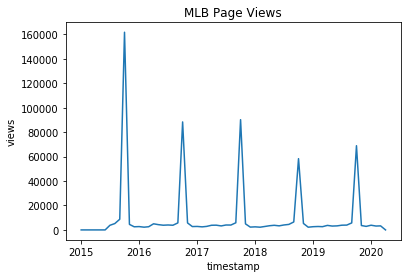

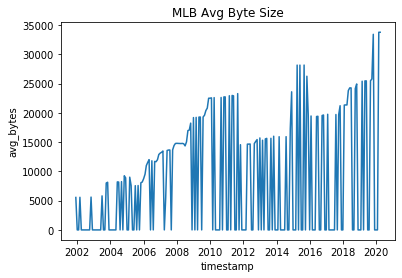

In [29]:
mlb_views = views_df[views_df["article_title"] == 'American_League_Championship_Series']

ax = sns.lineplot(x='timestamp', y='views', data=mlb_views)
ax.set_title("MLB Page Views")
plt.show()

mlb_df = df[df['article_title'] == 'American_League_Championship_Series']

ax = sns.lineplot(x='timestamp', y='avg_bytes', data=mlb_df)
ax.set_title("MLB Avg Byte Size")
plt.show()

# 7. Calculate the Content Scores

* Using Average Monthly Byte size and Page Views Per Month


In [30]:
from engagement_score import content_engagement_score

db_outfile = "../data/temp/articles.db"
pageviews_outfile = "../data/temp/pageviews.csv"
output_dir = "../data/out"

content_score = content_engagement_score(pageviews_outfile, db_outfile, output_dir + "/content_engagement.csv")
content_score['article_title'].nunique()

Writing Content Engagement Score to -- ../data/out/content_engagement.csv


1495

In [215]:
from engagement_score import content_engagement_score

db_outfile = "../data/out/articles.db"
pageviews_outfile = "../data/temp/pageviews.csv"
output_dir = "../data/out"

content_score = content_engagement_score(pageviews_outfile, db_outfile, output_dir + "/content_engagement.csv")
content_score.head()

Writing Content Engagement Score to -- ../data/out/content_engagement.csv


,article_title,timestamp,content_engagement
0,Aardvark,2015-08-01,0.004713
1,Aardvark,2015-09-01,-0.215383
2,Aardvark,2015-10-01,0.228697
3,Aardvark,2015-11-01,-0.018487
4,Aardvark,2015-12-01,0.004245


In [ ]:
joint_df = pd.DataFrame(columns=['article_title', 'timestamp', 'editor_score', 'content_score', 'engagement_score'])
articles = list(editor_score['article_title'].unique())

for article in articles:
    temp_df = editor_score[(editor_score['timestamp'] > '2015-08-01') & (editor_score['article_title'] == article)]
    editor_engagement = list(temp_df['editor_score'])
    timestamps = list(temp_df['timestamp'])
    content_engagement = list(content_score[content_score['article_title'] == article]['content_engagement'])
    
    joint_score = [editor_engagement[i] * content_engagement[i] for i in range(len(editor_engagement))]
    
    article_df = pd.DataFrame({"article_title": temp_df['article_title'], 
                       "timestamp": timestamps,
                       "editor_score": editor_engagement, 
                       "content_score": content_engagement, 
                       "engagement_score": joint_score})
    joint_df = pd.concat([joint_df, article_df])

In [216]:
def joint_engagement(content_df, editor_df, article_name, outfile="./data/out"):
    editor_score = list(editor_df[editor_df['timestamp'] > '2015-08-01']['editor_engagement'])
    
    timestamps = list(content_df[content_df['article_title'] == article_name]['timestamp'])
    
    content_score = list(content_df[content_df['article_title'] == article_name]['content_engagement'])
    
    joint_score = [editor_score[i] * content_score[i] for i in range(len(editor_score))]
    
    df = pd.DataFrame({"article_title": [article_name for _ in range(len(joint_score))], 
                       "timestamp": timestamps,
                       "editor_score": editor_score, 
                       "content_score": content_score, 
                       "engagement_score": joint_score})
    
    df.to_csv(outfile + "/" + article_name + "-score.csv")
    
    return df

In [219]:
joint_blizzard = joint_engagement(content_score, blizzard_df, "Blizzard_Entertainment", '../data/out')
joint_blizzard

,article_title,timestamp,editor_score,content_score,engagement_score


No handles with labels found to put in legend.


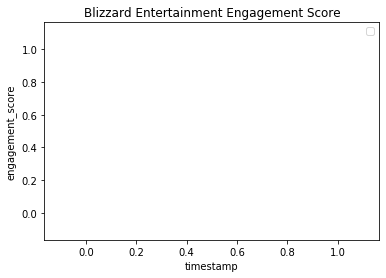

In [218]:
sns.set_context(rc={"lines.linewidth": .80})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

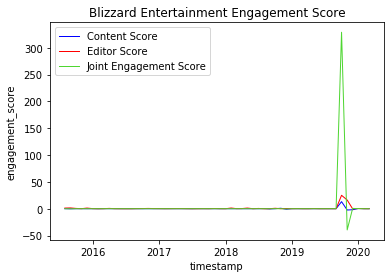

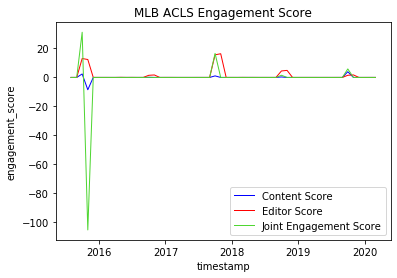

In [22]:
sns.set_context(rc={"lines.linewidth": 1.0})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

joint_mlb = joint_engagement(content_score, mlb_df, "American_League_Championship_Series", '../data/out')

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_mlb, label="Content Score", color="blue")
ax.set_title("MLB ACLS Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_mlb, label="Editor Score", color="red")
ax.set_title("MLB ACLS Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_mlb, label="Joint Engagement Score", color="#4FD632")
ax.set_title("MLB ACLS Engagement Score")
ax.legend()

plt.show()

,article_title,timestamp,editor_score
0,Anarchism,2001-11-30,0.000030
1,Anarchism,2001-12-31,-0.000049
2,Anarchism,2002-01-31,0.001573
3,Anarchism,2002-02-28,0.006053
4,Anarchism,2002-03-31,0.004204
...,...,...,...
66278,AVL_tree,2019-11-30,0.000160
66279,AVL_tree,2019-12-31,0.485878
66280,AVL_tree,2020-01-31,0.069206
66281,AVL_tree,2020-02-29,-0.000000


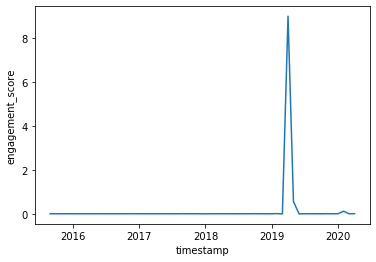

In [149]:
test = joint_df[joint_df['article_title']=="Anarchism"]
ax = sns.lineplot(x='timestamp', y='engagement_score', data=test)
plt.show()

In [157]:
test_df = joint_df[joint_df['article_title'] == "Anarchism"]


,article_title,timestamp,editor_score,content_score,engagement_score
165,Anarchism,2015-08-31,0.002898,0.001692,4.904011e-06
166,Anarchism,2015-09-30,0.010552,0.000826,8.720917e-06
167,Anarchism,2015-10-31,0.076233,0.007975,6.079457e-04
168,Anarchism,2015-11-30,0.032255,0.001025,3.306987e-05
169,Anarchism,2015-12-31,0.029490,-0.004076,-1.202157e-04
170,Anarchism,2016-01-31,0.026388,0.000343,9.056439e-06
171,Anarchism,2016-02-29,0.001043,0.006831,7.123911e-06
172,Anarchism,2016-03-31,-0.006627,0.000050,-3.346163e-07
173,Anarchism,2016-04-30,0.015314,-0.006288,-9.629869e-05
174,Anarchism,2016-05-31,0.010280,0.023554,2.421365e-04


In [194]:
articles = list(joint_df['article_title'].unique())
out_dict = {}

for article in articles:
    test_df = joint_df[joint_df['article_title'] == article][['timestamp', 'editor_score', 'content_score', 'engagement_score']]
    out_dict[article] = test_df.values.tolist()
    
    

In [197]:
import json
import datetime
 
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()
    else:
        o.__str__()

score_outdir = "../website_data"

if not os.path.exists(score_outdir):
        os.makedirs(score_outdir, exist_ok=True)
        
with open(score_outdir + "/engagement_scores.json", 'w') as outfile:
    json.dump(out_dict, outfile, default=myconverter)
    
def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + content)
        
line_prepender(score_outdir + "/engagement_scores.json", "data = ")

In [172]:
with open(score_outdir + "/article_titles.txt", 'w') as outfile:
    for name in article_titles:
        outfile.write(name + "\n")

In [188]:
from engagement_score import selectArticlesDB

outfile = "../engagement_scores.db"
conn = sqlite3.connect(outfile)
c = conn.cursor()
sql_query = "SELECT * FROM SCORES"
c.execute(sql_query)
df = pd.DataFrame(c.fetchall(), columns=['article_title', 'timestamp', 'editor_score', 'content_score', 'engagement_score'])    
df

,article_title,timestamp,editor_score,content_score,engagement_score
0,Blizzard_Entertainment,2015-08-01 00:00:00,1.179937,0.019660,0.023197
1,Blizzard_Entertainment,2015-09-01 00:00:00,1.459123,-0.153639,-0.224178
2,Blizzard_Entertainment,2015-10-01 00:00:00,0.550742,0.000452,0.000249
3,Blizzard_Entertainment,2015-11-01 00:00:00,0.088596,0.036129,0.003201
4,Blizzard_Entertainment,2015-12-01 00:00:00,1.188823,-0.012127,-0.014416
...,...,...,...,...,...
107,American_League_Championship_Series,2019-11-01 00:00:00,1.745391,0.000000,0.000000
108,American_League_Championship_Series,2019-12-01 00:00:00,0.000000,0.000000,0.000000
109,American_League_Championship_Series,2020-01-01 00:00:00,0.000000,0.000000,0.000000
110,American_League_Championship_Series,2020-02-01 00:00:00,0.007757,-0.001927,-0.000015


In [227]:
joint_df = pd.concat([joint_df, df])
joint_df['timestamp']= pd.to_datetime(df['timestamp']) 


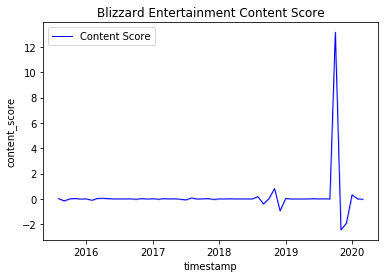

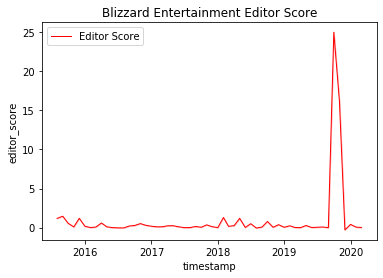

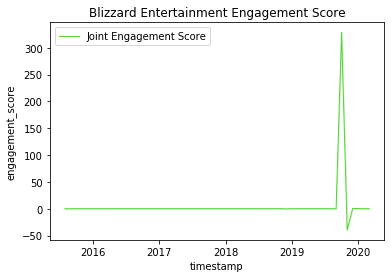

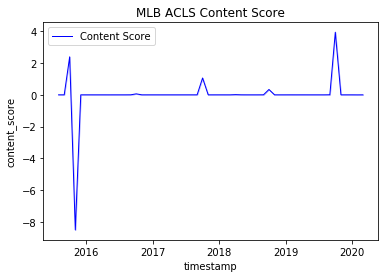

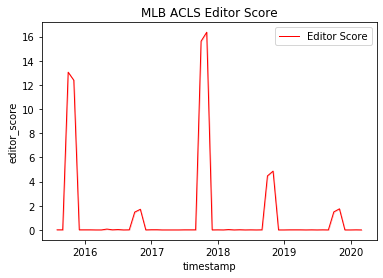

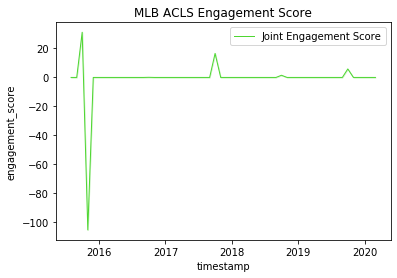

In [228]:
joint_blizzard = joint_df[joint_df['article_title'] == "Blizzard_Entertainment"]

sns.set_context(rc={"lines.linewidth": 1.0})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

joint_mlb = joint_df[joint_df['article_title'] == "American_League_Championship_Series"]

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_mlb, label="Content Score", color="blue")
ax.set_title("MLB ACLS Content Score")
plt.show()


ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_mlb, label="Editor Score", color="red")
ax.set_title("MLB ACLS Editor Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_mlb, label="Joint Engagement Score", color="#4FD632")
ax.set_title("MLB ACLS Engagement Score")
ax.legend()

plt.show()